In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv(r"D:\pricing-optimization-system\data\raw\pricing_data.csv")
df.head()

,price,quantity_sold
0,43.708611,1646.916227
1,95.564288,1117.621308
2,75.879455,1335.464788
3,63.879264,1437.115903
4,24.041678,1840.823666


In [2]:
df = df[df["quantity_sold"] > 0]  # safety
df["log_price"] = np.log(df["price"])
df["log_quantity"] = np.log(df["quantity_sold"])

df.head()

,price,quantity_sold,log_price,log_quantity
0,43.708611,1646.916227,3.777545,7.406660
1,95.564288,1117.621308,4.559799,7.018958
2,75.879455,1335.464788,4.329146,7.197035
3,63.879264,1437.115903,4.156995,7.270394
4,24.041678,1840.823666,3.179789,7.517968


In [ ]:
X = sm.add_constant(df["log_price"])
y = df["log_quantity"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_quantity   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     6149.
Date:                Fri, 30 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:24:54   Log-Likelihood:                 1337.1
No. Observations:                1000   AIC:                            -2670.
Df Residuals:                     998   BIC:                            -2660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3087      0.013    636.426      0.000       8.283       8.334
log_price     -0.2635      0.003    -78.418      0.000      -0.270      -0.257
==============================================================================
Omnibus:                       47.747   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.382
Skew:                          -0.533   Prob(JB):                     6.96e-12
Kurtosis:                       2.691   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Regression Results – Model Interpretation

This section explains the output of the **log–log OLS regression model** used to estimate **price elasticity of demand**.

---

### Model Overview

- **Dependent Variable:** `log_quantity`  
- **Independent Variable:** `log_price`  
- **Model Type:** Ordinary Least Squares (OLS)

The model estimates how percentage changes in price affect percentage changes in demand.

---

### Model Performance

- **R-squared:** **0.860**  
  → About **86% of the variation in demand** is explained by price alone.

- **Adjusted R-squared:** **0.860**  
  → Confirms strong explanatory power even after accounting for model complexity.

- **F-statistic:** **6149**  
- **Prob (F-statistic):** **0.00**  
  → The model is **statistically significant overall**.

---

### Coefficient Interpretation

| Variable | Coefficient | Interpretation |
|--------|-------------|----------------|
| `const` | 8.3087 | Baseline log-demand when price is constant |
| `log_price` | **−0.2635** | **Price elasticity of demand** |

#### Price Elasticity Insight

- A **1% increase in price** results in approximately a **0.264% decrease in demand**
- Demand is **relatively inelastic**
- Customers are **not highly sensitive** to price changes

---

### Statistical Significance

- **P-value for log_price:** **< 0.001**  
  → The relationship between price and demand is **highly significant**

- **95% Confidence Interval:** **[−0.270, −0.257]**  
  → Elasticity estimate is precise and reliable

- **Durbin–Watson:** **2.03**  
  → No significant autocorrelation in residuals

- **Jarque–Bera Test (p < 0.001):**  
  → The null hypothesis of normally distributed residuals is **rejected**, indicating **non-normal residuals**

- **Skew:** −0.53  
- **Kurtosis:** 2.69  
  → Residuals exhibit mild skewness and near-normal kurtosis, which is common in large real-world datasets

---

### Summary

- The model explains demand behavior **very well**
- Price has a **statistically significant** but **inelastic** effect on demand
- Revenue optimization is likely achievable through **strategic price increases**
- The model is **robust and suitable** for pricing decisions

---

### Assumption Note

Standard errors assume that the variance of errors is constant (homoscedasticity).  
This assumption is acceptable for this analysis but should be validated in real-world data.


In [4]:
price_elasticity = model.params["log_price"]
price_elasticity

np.float64(-0.26353988048119625)

### Price Elasticity of Demand – Interpretation

Price elasticity measures how demand responds to changes in price:

> **“If price increases by 1%, how much does demand change?”**

#### Elasticity Interpretation
- **Elasticity < −1** → Highly elastic (very price sensitive)  
- **Elasticity ≈ −1** → Unit elastic  
- **Elasticity > −1** → Inelastic (less price sensitive)  

---

### Model Result

The estimated **price elasticity of demand is −0.264**.

This implies:
- A **1% increase in price** leads to approximately a **0.264% decrease in demand**

---

### Business Insight

- Demand is **relatively inelastic**
- Customers are **not highly sensitive** to price changes
- Sales volume is **not sharply affected** by moderate price increases
- The product demonstrates **pricing power**

---

### Strategic Implication

Because demand is inelastic:
- **Moderate price increases** are likely to **increase total revenue**
- Revenue optimization is more effective through **pricing strategy** than volume growth

---

### Elasticity Categories (Summary)

| Elasticity Value | Interpretation |
|-----------------|----------------|
| < −1 | Highly elastic (price sensitive) |
| ≈ −1 | Unit elastic |
| **−0.264** | **Inelastic (low sensitivity)** |
| 0 | No price sensitivity |


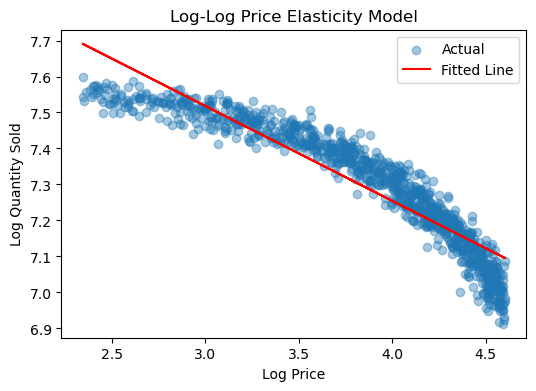

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["log_price"], df["log_quantity"], alpha=0.4, label="Actual")
plt.plot(df["log_price"], model.predict(X), color="red", label="Fitted Line")
plt.xlabel("Log Price")
plt.ylabel("Log Quantity Sold")
plt.title("Log-Log Price Elasticity Model")
plt.legend()
plt.savefig(r"D:\pricing-optimization-system\images\price_elasticity_fit.png")
plt.show()

The estimated price elasticity of demand is −0.264, indicating that demand is relatively inelastic. This suggests that moderate price changes are unlikely to significantly impact sales volume, providing an opportunity to increase revenue through price optimization.